In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from fase2_funciones import *
from time import time


df_bd_preprocesada = pd.read_csv('BD/OnlineRetail_Preprocesada.csv', sep=',', encoding = 'unicode_escape')
df_pivot = df_bd_preprocesada['InvoiceDate'].str.split(expand = True)
df_pivot.rename(columns = {0: 'Fecha', 1: 'Hora'}, inplace=True)
df_bd_preprocesada = df_bd_preprocesada.drop(columns =['Unnamed: 0','InvoiceDate'])
df_bd_preprocesada = pd.concat([df_bd_preprocesada,df_pivot], axis = 1)
df_bd_preprocesada['Monto'] = df_bd_preprocesada['UnitPrice'] * df_bd_preprocesada['Quantity']


In [2]:
df_bd_preprocesada_new = df_bd_preprocesada[df_bd_preprocesada.Quantity <10000]
#plt.scatter(df_bd_preprocesada_new['Quantity'],df_bd_preprocesada_new['Description'],s=50)

#df_bd_preprocesada_new

In [3]:
df_bd_aux=df_bd_preprocesada_new.drop(['StockCode','Monto','Description','Country','Fecha','Hora','InvoiceNo'],axis=1)
df_bd_Normalizada = (df_bd_aux-df_bd_aux.min())/(df_bd_aux.max()-df_bd_aux.min())
#df_bd_Normalizada

In [4]:
features = list(df_bd_Normalizada.columns)[:]
print(features)

['Quantity', 'UnitPrice', 'CustomerID']


In [5]:
BD_atrib = df_bd_Normalizada[features[:-1]]
BD_clase = df_bd_Normalizada['CustomerID']
X_train, X_test, Y_train, Y_test = train_test_split(BD_atrib,
                                                    BD_clase,
                                                    test_size=0.2,
                                                    random_state =0)


In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_reducido = pca.transform(X_train)

print("Reduced dataset shape:", X_reducido.shape)

Reduced dataset shape: (314183, 2)


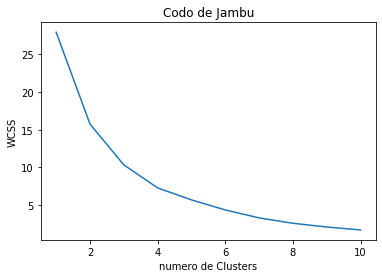

In [87]:
wcss = []

for i in range (1,11):
    kmeans = KMeans(n_clusters = i, max_iter=300)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title("Codo de Jambu")
plt.xlabel("numero de Clusters")
plt.ylabel("WCSS")
plt.show()

['Quantity', 'UnitPrice', 'CustomerID']


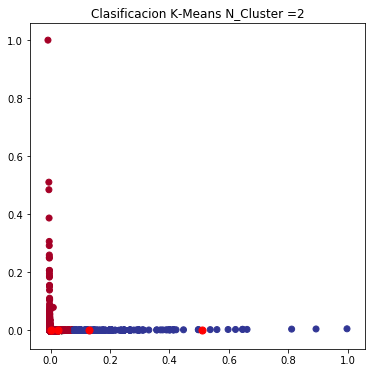

tiempo: 12.3621902466 segundos. 



In [10]:
start_time = time()

clustering = KMeans(n_clusters = 2, max_iter=300)
clustering.fit(X_train)
y_pred = clustering.predict(X_train)
plt.figure(figsize=(6,6))
pl.scatter(X_reducido[:,0], X_reducido[:,1], c=y_pred,
           cmap='RdYlBu'); 
pl.scatter(centroides[:, 0], centroides[:, 1], c='red',s=50)
print(features)
plt.title('Clasificacion K-Means N_Cluster =2')
plt.show()

elapsed_time = time() - start_time
print("tiempo: %0.10f segundos. \n" % elapsed_time)

In [11]:
print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            features)))

Meaning of the 2 components:
1.000 x Quantity + -0.006 x UnitPrice
0.006 x Quantity + 1.000 x UnitPrice


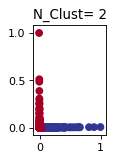

tiempo: 2.5731103420 segundos. 

N_Centroides:
[[2.17238592e-03 3.83901600e-04]
 [1.50680546e-01 1.46507140e-04]]



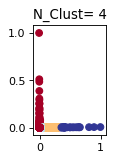

tiempo: 3.7007362843 segundos. 

N_Centroides:
[[1.56379539e-03 3.89398445e-04]
 [1.30847448e-01 1.47971488e-04]
 [2.57954644e-02 1.70535776e-04]
 [5.08360219e-01 1.20098374e-04]]



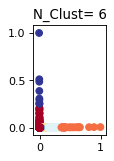

tiempo: 4.5342996120 segundos. 

N_Centroides:
[[1.53407814e-03 3.77270630e-04]
 [5.14616140e-01 1.23291096e-04]
 [5.55863063e-02 1.70928514e-04]
 [1.67106784e-01 1.30686249e-04]
 [1.98390211e-02 1.89206866e-04]
 [0.00000000e+00 4.16142649e-01]]



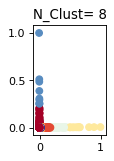

tiempo: 6.4998121262 segundos. 

N_Centroides:
[[9.10575939e-04 4.09913340e-04]
 [1.14830113e-01 1.51887120e-04]
 [4.95701320e-02 1.72317913e-04]
 [6.66458290e-01 1.05308403e-04]
 [2.74397444e-01 1.20461624e-04]
 [5.82129467e-03 1.60961774e-04]
 [0.00000000e+00 4.16142649e-01]
 [2.04304295e-02 1.73461683e-04]]



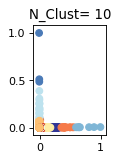

tiempo: 6.7866930962 segundos. 

N_Centroides:
[[5.86207227e-03 1.61544027e-04]
 [5.03990735e-02 1.72381347e-04]
 [4.25692853e-01 1.24834976e-04]
 [9.10617109e-04 4.02740584e-04]
 [1.17010228e-01 1.49278163e-04]
 [2.06848197e-02 1.70262886e-04]
 [8.67361738e-19 2.03216222e-01]
 [7.36924359e-01 1.19431396e-04]
 [0.00000000e+00 6.65341562e-01]
 [2.43236328e-01 1.20725550e-04]]



In [16]:
for i in range (1,6):
    start_time = time()
    fig = plt.figure(figsize = (4,4),dpi=80)
    plt.subplot(2,3,i)
    clustering = KMeans(n_clusters = i*2, max_iter=300)
    clustering.fit(X_train)
    y_pred = clustering.predict(X_train)
    pl.scatter(X_reducido[:, 0], X_reducido[:, 1], c=y_pred,
           cmap='RdYlBu'); 
    n_cluster = i*2
    plt.title('N_Clust= %i' %n_cluster)
    elapsed_time = time() - start_time
    N_centroides = clustering.cluster_centers_
    plt.show()
    print("tiempo: %0.10f segundos. \n" % elapsed_time)
    print("N_Centroides:\n{}\n" .format(N_centroides))